In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


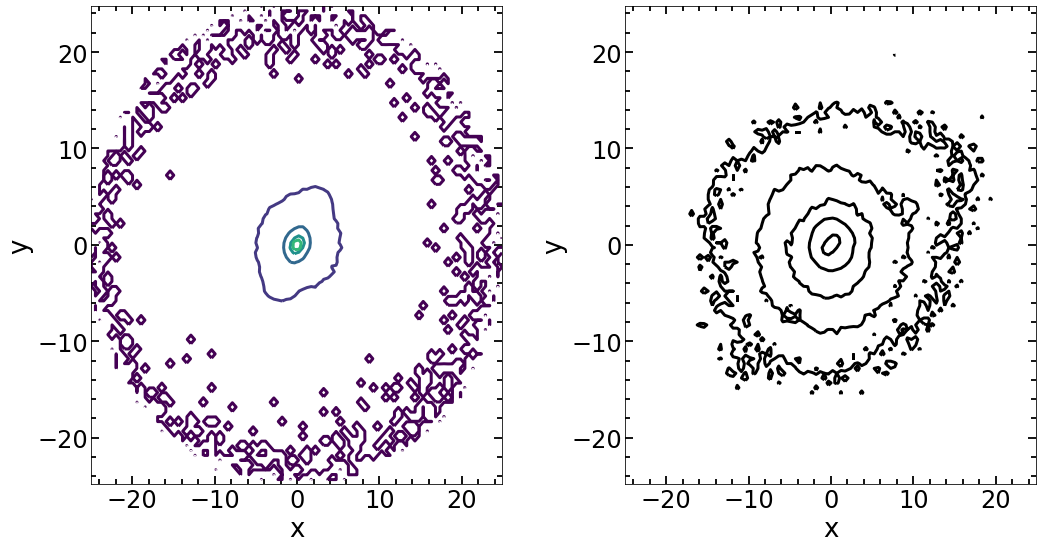

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')

cm=np.loadtxt('/home/ornela/python/energia_potencial0.dat')
u_str = cm[:,0]
u_gas = cm[:,1]
u_drk = cm[:,2]

snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_497.h5py', 'r')


cm   = snap['subhalo_000/Center'].value
r200 = snap['subhalo_000/R200'].value
aexp = snap['subhalo_000/Time'].value

pstr = snap['subhalo_000/Str/Coordinates'].value
masa_str = snap['subhalo_000/Str/Masses'].value
vel  = snap['subhalo_000/Str/Velocities'].value

pgas = snap['subhalo_000/Gas/Coordinates'].value
masa_gas = snap['subhalo_000/Gas/Masses'].value

pdrk = snap['subhalo_000/Drk/Coordinates'].value
masa_drk = snap['subhalo_000/Drk/Masses'].value

z = a0/aexp - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp/h
ystr = (pstr[:,1]-cm[1])*aexp/h
zstr = (pstr[:,2]-cm[2])*aexp/h
r = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = (pgas[:,0]-cm[0])*aexp/h
ygas = (pgas[:,1]-cm[1])*aexp/h
zgas = (pgas[:,2]-cm[2])*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = (pdrk[:,0]-cm[0])*aexp/h
ydrk = (pdrk[:,1]-cm[1])*aexp/h
zdrk = (pdrk[:,2]-cm[2])*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.

#----------------------masas----------------------------
masa_str = masa_str/h
masa_gas = masa_gas/h
masa_drk = masa_drk/h

r200 = r200*aexp/h
rgal=0.15*r200

limit = np.where(r<rgal)
limit_str = np.where(r<r200)
limit_gas = np.where(rgas<r200)
limit_drk = np.where(rdrk<r200)

#-----------------para las veloc----------------------------------------------------
r_sort = np.sort(r[limit])
r_indice = np.argsort(r[limit])

Mc = np.cumsum((masa_str[limit])[r_indice])
Mgal = Mc[-1]

razon = Mc/Mgal
noventa, = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa]
r50 = r_sort[cincuenta]
#------------------------------------------------------------------        
#----------componentes de la velocidad del centro de masa------------

veloc,=np.where(r<r50[-1])

vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])


# ------ posiciones y veloc rotadas de las estrellas -------------------------------------
xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz

xn = xn[limit]
yn = yn[limit]
zn = zn[limit]
v_x = vxn[limit]
v_y = vyn[limit]
v_z = vzn[limit]


U = u_str + u_gas + u_drk

# print len(u_str), num

bins = 100
counts,xedges,yedges = histogram2d(xn,yn,bins)
H, edges = histogram(U,6)
# H2, edges2 = histogram(counts,8)#, normed=LogNorm())
edges1 = [10,50,150, 500,5000]
# edges = [0,20,80,150,300,700,1000]
pot = zeros((bins,bins))

for i in range(0,bins):
    for j in range(0,bins):
        mask, = np.where((x0<xedges[i+1]) & (x0>xedges[i]) & (y0<yedges[j+1]) & (y0>yedges[j]))
        pot[i,j] = sum(U[mask])
        if len(U[mask]) != 0:
            pot[i,j] = pot[i,j]/len(U[mask])

# CS = contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3)
# H=np.ndarray([num,3])
# H[:,0]=x0
# H[:,1]=y0
# H[:,2]=U

fig=plt.figure(1,figsize=(16,8))
# fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
fig.subplots_adjust(bottom=0.12, left =0.1, right = 0.92, top = 0.95, wspace=0.3, hspace= 0)
ax=fig.add_subplot(121)
ax.contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3, levels = edges)
ax.set_xlabel('x', fontsize=26)
ax.set_ylabel('y', fontsize=26)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax1=fig.add_subplot(122)
ax1.contour(counts,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
# ax.clabel(CS, CS.levels[::1], inline=True, fontsize=10)
ax1.set_xlabel('x', fontsize=26)
ax1.set_ylabel('y', fontsize=26)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
plt.show()


#     pos=np.ndarray([3,np.size(xn)])
#     pos[0,:]=xn
#     pos[1,:]=yn
#     pos[2,:]=zn

# #---------------------generador del gráfico-----------------
#     rl=25   
#     corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

# #-----rango que tiene la escala  de colores-----
#     vmin=1
#     vmax=7

# # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
#     cmap='gnuplot'

# #-----grafico-----------
#     fig=plt.figure(1,figsize=(8,13))
#     fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)

#     particles=sph.Particles(pos[:,corte],masa_str[corte]*1e10,nb=50)
#     escena=sph.Scene(particles)
#     escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
#     rend=sph.Render(escena)
#     extent=escena.get_extent()
#     rend.set_logscale()

#     ax1=fig.add_subplot(211)
#     plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
#     #plt.axis('off')
#     #ax1.set_title('Gadget - '+ str('%s'%vector2[i]), fontsize=18)
#     ax1.set_xticklabels([])
#     #plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
#     plt.ylabel('$y$'+' $[kpc]$', fontsize=30)
#     ax1.minorticks_on()
#     ax1.tick_params( labelsize=24)
#     ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
#     ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
#     plt.text(-22, 21,'GADGET-'+'%s'%vector2[i], fontsize=24, color='yellow', ha='left', va='center') 
#              #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
#     #plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
#     #              ha='center', va='center', 
#     #             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))

#     #plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')



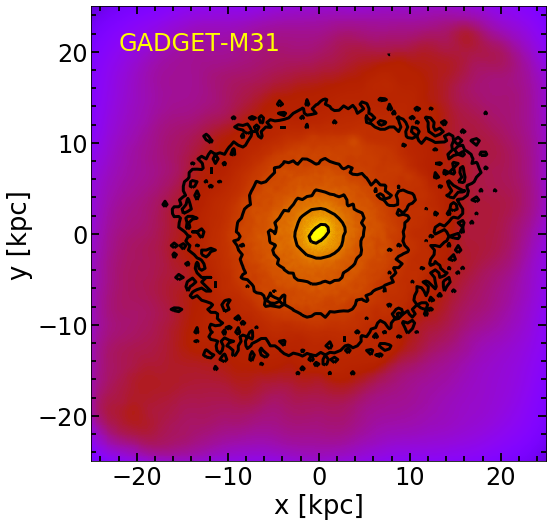

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')

cm=np.loadtxt('/home/ornela/python/energia_potencial0.dat')
u_str = cm[:,0]
u_gas = cm[:,1]
u_drk = cm[:,2]

snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_496.h5py', 'r')


cm   = snap['subhalo_000/Center'].value
r200 = snap['subhalo_000/R200'].value
aexp = snap['subhalo_000/Time'].value

pstr = snap['subhalo_000/Str/Coordinates'].value
masa_str = snap['subhalo_000/Str/Masses'].value
vel  = snap['subhalo_000/Str/Velocities'].value

pgas = snap['subhalo_000/Gas/Coordinates'].value
masa_gas = snap['subhalo_000/Gas/Masses'].value

pdrk = snap['subhalo_000/Drk/Coordinates'].value
masa_drk = snap['subhalo_000/Drk/Masses'].value

z = a0/aexp - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp/h
ystr = (pstr[:,1]-cm[1])*aexp/h
zstr = (pstr[:,2]-cm[2])*aexp/h
r = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = (pgas[:,0]-cm[0])*aexp/h
ygas = (pgas[:,1]-cm[1])*aexp/h
zgas = (pgas[:,2]-cm[2])*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = (pdrk[:,0]-cm[0])*aexp/h
ydrk = (pdrk[:,1]-cm[1])*aexp/h
zdrk = (pdrk[:,2]-cm[2])*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.

#----------------------masas----------------------------
masa_str = masa_str/h
masa_gas = masa_gas/h
masa_drk = masa_drk/h

r200 = r200*aexp/h
rgal=0.15*r200

limit = np.where(r<rgal)
limit_str = np.where(r<r200)
limit_gas = np.where(rgas<r200)
limit_drk = np.where(rdrk<r200)

#-----------------para las veloc----------------------------------------------------
r_sort = np.sort(r[limit])
r_indice = np.argsort(r[limit])

Mc = np.cumsum((masa_str[limit])[r_indice])
Mgal = Mc[-1]

razon = Mc/Mgal
noventa, = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa]
r50 = r_sort[cincuenta]
#------------------------------------------------------------------        
#----------componentes de la velocidad del centro de masa------------

veloc,=np.where(r<r50[-1])

vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])


# ------ posiciones y veloc rotadas de las estrellas -------------------------------------
xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz

# xn = xn[limit]
# yn = yn[limit]
# zn = zn[limit]
# v_x = vxn[limit]
# v_y = vyn[limit]
# v_z = vzn[limit]


U = u_str + u_gas + u_drk

# print len(u_str), num

bins = 100
counts,xedges,yedges = histogram2d(xn[limit],yn[limit],bins)
# H, edges = histogram(U,6)
# H2, edges2 = histogram(counts,8)#, normed=LogNorm())
edges1 = [10,50,150, 500,5000]
# edges = [0,20,80,150,300,700,1000]
# pot = zeros((bins,bins))

# for i in range(0,bins):
#     for j in range(0,bins):
#         mask, = np.where((x0<xedges[i+1]) & (x0>xedges[i]) & (y0<yedges[j+1]) & (y0>yedges[j]))
#         pot[i,j] = sum(U[mask])
#         if len(U[mask]) != 0:
#             pot[i,j] = pot[i,j]/len(U[mask])

# CS = contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3)
# H=np.ndarray([num,3])
# H[:,0]=x0
# H[:,1]=y0
# H[:,2]=U

fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
# fig.subplots_adjust(bottom=0.12, left =0.1, right = 0.92, top = 0.95, wspace=0.3, hspace= 0)
# ax=fig.add_subplot(121)
# ax.contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3, levels = edges)
# ax.set_xlabel('x', fontsize=26)
# ax.set_ylabel('y', fontsize=26)
# ax.minorticks_on()
# ax.tick_params( labelsize=24)
# ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
# ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax1=fig.add_subplot(111)
ax1.contour(counts,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
# ax.clabel(CS, CS.levels[::1], inline=True, fontsize=10)
ax1.set_xlabel('x [kpc]', fontsize=26)
ax1.set_ylabel('y [kpc]', fontsize=26)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')



pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xn
pos[1,:]=yn
pos[2,:]=zn

#---------------------generador del gráfico-----------------
rl=25   
corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'

# #-----grafico-----------
#     fig=plt.figure(1,figsize=(8,13))
#     fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)

particles=sph.Particles(pos[:,corte],masa_str[corte]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

#     ax1=fig.add_subplot(211)
ax1.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
#plt.axis('off')
#ax1.set_title('Gadget - '+ str('%s'%vector2[i]), fontsize=18)
# ax1.set_xticklabels([])
#plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
# plt.ylabel('$y$'+' $[kpc]$', fontsize=30)
# ax1.minorticks_on()
# ax1.tick_params( labelsize=24)
# ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
# ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
plt.text(-22, 21,'GADGET-M31', fontsize=24, color='yellow', ha='left', va='center') 
         #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
#plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
#              ha='center', va='center', 
#             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))

#plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')

fig.savefig('/home/ornela/python/SAN/Isodens_M31gd.png', dpi = 100)
plt.show()

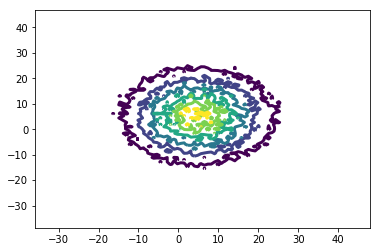

In [74]:
from matplotlib.colors import LogNorm
from matplotlib.pyplot import *

x = np.random.normal(5,10,100000)
y = np.random.normal(5,10,100000)
counts,ybins,xbins = histogram2d(x,y,bins=100)
contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(aa, bb, range=[[293.,1454.0], [464.,1896.0]], bins=(50, 50))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
subplots_adjust(bottom=0.15, left=0.15)
levels = (1.0e4, 1.0e3, 1.0e2, 2.0e1)
cset = contour(H, levels, origin=’lower’,colors=[‘black’,’green’,’blue’,’red’],linewidths=(1.9, 1.6, 1.5, 1.4),extent=extent)
plt.clabel(cset, inline=1, fontsize=10, fmt=’%1.0i’)
for c in cset.collections:
c.set_linestyle(‘solid’)



SyntaxError: invalid syntax (<ipython-input-35-478f2484fbf9>, line 7)

ValueError: too many values to unpack

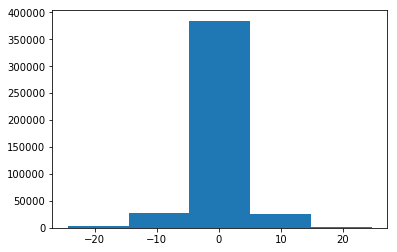

In [7]:
H, edges = hist(x0,5)

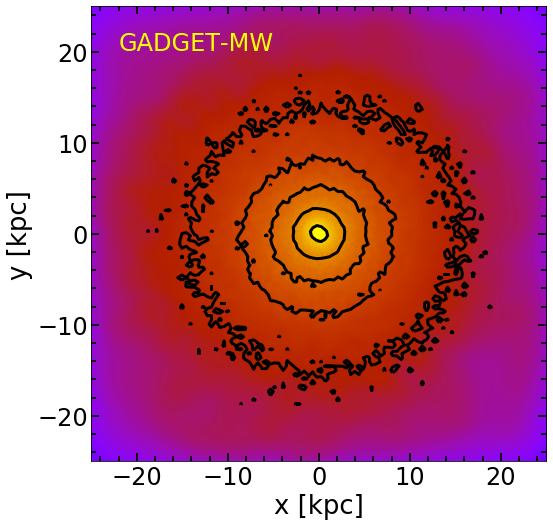

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_496.h5py', 'r')


cm   = snap['subhalo_001/Center'].value
r200 = snap['subhalo_001/R200'].value
aexp = snap['subhalo_001/Time'].value

pstr = snap['subhalo_001/Str/Coordinates'].value
masa_str = snap['subhalo_001/Str/Masses'].value
vel  = snap['subhalo_001/Str/Velocities'].value

pgas = snap['subhalo_001/Gas/Coordinates'].value
masa_gas = snap['subhalo_001/Gas/Masses'].value

pdrk = snap['subhalo_001/Drk/Coordinates'].value
masa_drk = snap['subhalo_001/Drk/Masses'].value

z = a0/aexp - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp/h
ystr = (pstr[:,1]-cm[1])*aexp/h
zstr = (pstr[:,2]-cm[2])*aexp/h
r = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = (pgas[:,0]-cm[0])*aexp/h
ygas = (pgas[:,1]-cm[1])*aexp/h
zgas = (pgas[:,2]-cm[2])*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = (pdrk[:,0]-cm[0])*aexp/h
ydrk = (pdrk[:,1]-cm[1])*aexp/h
zdrk = (pdrk[:,2]-cm[2])*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.

#----------------------masas----------------------------
masa_str = masa_str/h
masa_gas = masa_gas/h
masa_drk = masa_drk/h

r200 = r200*aexp/h
rgal=0.15*r200

limit = np.where(r<rgal)
limit_str = np.where(r<r200)
limit_gas = np.where(rgas<r200)
limit_drk = np.where(rdrk<r200)

#-----------------para las veloc----------------------------------------------------
r_sort = np.sort(r[limit])
r_indice = np.argsort(r[limit])

Mc = np.cumsum((masa_str[limit])[r_indice])
Mgal = Mc[-1]

razon = Mc/Mgal
noventa, = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa]
r50 = r_sort[cincuenta]
#------------------------------------------------------------------        
#----------componentes de la velocidad del centro de masa------------

veloc,=np.where(r<r50[-1])

vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])


# ------ posiciones y veloc rotadas de las estrellas -------------------------------------
xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz

# xn = xn[limit]
# yn = yn[limit]
# zn = zn[limit]
# v_x = vxn[limit]
# v_y = vyn[limit]
# v_z = vzn[limit]


U = u_str + u_gas + u_drk

# print len(u_str), num

bins = 100
counts,xedges,yedges = histogram2d(xn[limit],yn[limit],bins)
# H, edges = histogram(U,6)
# H2, edges2 = histogram(counts,8)#, normed=LogNorm())
edges1 = [10,50,150, 500,5000]
# edges = [0,20,80,150,300,700,1000]
# pot = zeros((bins,bins))

# for i in range(0,bins):
#     for j in range(0,bins):
#         mask, = np.where((x0<xedges[i+1]) & (x0>xedges[i]) & (y0<yedges[j+1]) & (y0>yedges[j]))
#         pot[i,j] = sum(U[mask])
#         if len(U[mask]) != 0:
#             pot[i,j] = pot[i,j]/len(U[mask])

# CS = contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3)
# H=np.ndarray([num,3])
# H[:,0]=x0
# H[:,1]=y0
# H[:,2]=U

fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
# fig.subplots_adjust(bottom=0.12, left =0.1, right = 0.92, top = 0.95, wspace=0.3, hspace= 0)
# ax=fig.add_subplot(121)
# ax.contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3, levels = edges)
# ax.set_xlabel('x', fontsize=26)
# ax.set_ylabel('y', fontsize=26)
# ax.minorticks_on()
# ax.tick_params( labelsize=24)
# ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
# ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax1=fig.add_subplot(111)
ax1.contour(counts,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
# ax.clabel(CS, CS.levels[::1], inline=True, fontsize=10)
ax1.set_xlabel('x [kpc]', fontsize=26)
ax1.set_ylabel('y [kpc]', fontsize=26)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')



pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xn
pos[1,:]=yn
pos[2,:]=zn

#---------------------generador del gráfico-----------------
rl=25   
corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'

# #-----grafico-----------
#     fig=plt.figure(1,figsize=(8,13))
#     fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)

particles=sph.Particles(pos[:,corte],masa_str[corte]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

#     ax1=fig.add_subplot(211)
ax1.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
#plt.axis('off')
#ax1.set_title('Gadget - '+ str('%s'%vector2[i]), fontsize=18)
# ax1.set_xticklabels([])
#plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
# plt.ylabel('$y$'+' $[kpc]$', fontsize=30)
# ax1.minorticks_on()
# ax1.tick_params( labelsize=24)
# ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
# ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
plt.text(-22, 21,'GADGET-MW', fontsize=24, color='yellow', ha='left', va='center') 
         #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
#plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
#              ha='center', va='center', 
#             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))

#plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')

fig.savefig('/home/ornela/python/SAN/Isodens_MWgd.png', dpi = 100)
plt.show()

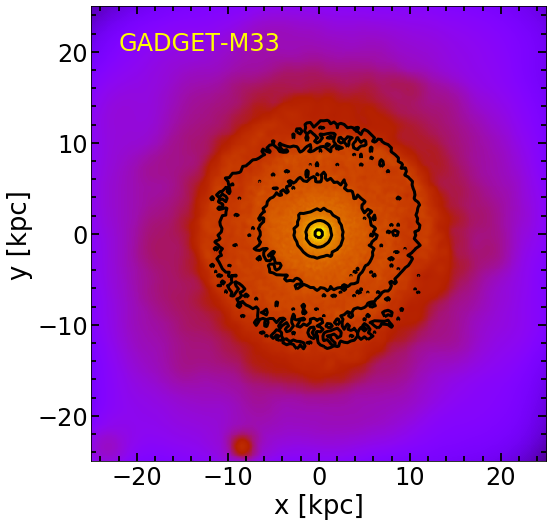

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_496.h5py', 'r')


cm   = snap['subhalo_003/Center'].value
r200 = snap['subhalo_003/R200'].value
aexp = snap['subhalo_003/Time'].value

pstr = snap['subhalo_003/Str/Coordinates'].value
masa_str = snap['subhalo_003/Str/Masses'].value
vel  = snap['subhalo_003/Str/Velocities'].value

pgas = snap['subhalo_003/Gas/Coordinates'].value
masa_gas = snap['subhalo_003/Gas/Masses'].value

pdrk = snap['subhalo_003/Drk/Coordinates'].value
masa_drk = snap['subhalo_003/Drk/Masses'].value

z = a0/aexp - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp/h
ystr = (pstr[:,1]-cm[1])*aexp/h
zstr = (pstr[:,2]-cm[2])*aexp/h
r = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = (pgas[:,0]-cm[0])*aexp/h
ygas = (pgas[:,1]-cm[1])*aexp/h
zgas = (pgas[:,2]-cm[2])*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = (pdrk[:,0]-cm[0])*aexp/h
ydrk = (pdrk[:,1]-cm[1])*aexp/h
zdrk = (pdrk[:,2]-cm[2])*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.

#----------------------masas----------------------------
masa_str = masa_str/h
masa_gas = masa_gas/h
masa_drk = masa_drk/h

r200 = r200*aexp/h
rgal=0.15*r200

limit = np.where(r<rgal)
limit_str = np.where(r<r200)
limit_gas = np.where(rgas<r200)
limit_drk = np.where(rdrk<r200)

#-----------------para las veloc----------------------------------------------------
r_sort = np.sort(r[limit])
r_indice = np.argsort(r[limit])

Mc = np.cumsum((masa_str[limit])[r_indice])
Mgal = Mc[-1]

razon = Mc/Mgal
noventa, = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa]
r50 = r_sort[cincuenta]
#------------------------------------------------------------------        
#----------componentes de la velocidad del centro de masa------------

veloc,=np.where(r<r50[-1])

vxcm = sum(masa_str[veloc]*v_x[veloc])/sum(masa_str[veloc])
vycm = sum(masa_str[veloc]*v_y[veloc])/sum(masa_str[veloc])
vzcm = sum(masa_str[veloc]*v_z[veloc])/sum(masa_str[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = vel[:,0] - vxcm
vy = vel[:,1] - vycm
vz = vel[:,2] - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa_str,xstr,ystr,zstr,vx,vy,vz,r90[-1])


# ------ posiciones y veloc rotadas de las estrellas -------------------------------------
xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz

# xn = xn[limit]
# yn = yn[limit]
# zn = zn[limit]
# v_x = vxn[limit]
# v_y = vyn[limit]
# v_z = vzn[limit]


U = u_str + u_gas + u_drk

# print len(u_str), num

bins = 100
counts,xedges,yedges = histogram2d(xn[limit],yn[limit],bins)
# H, edges = histogram(U,6)
# H2, edges2 = histogram(counts,8)#, normed=LogNorm())
edges1 = [20,50,150, 500,5000]
# edges = [0,20,80,150,300,700,1000]
# pot = zeros((bins,bins))

# for i in range(0,bins):
#     for j in range(0,bins):
#         mask, = np.where((x0<xedges[i+1]) & (x0>xedges[i]) & (y0<yedges[j+1]) & (y0>yedges[j]))
#         pot[i,j] = sum(U[mask])
#         if len(U[mask]) != 0:
#             pot[i,j] = pot[i,j]/len(U[mask])

# CS = contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3)
# H=np.ndarray([num,3])
# H[:,0]=x0
# H[:,1]=y0
# H[:,2]=U

fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
# fig.subplots_adjust(bottom=0.12, left =0.1, right = 0.92, top = 0.95, wspace=0.3, hspace= 0)
# ax=fig.add_subplot(121)
# ax.contour(pot,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=3, levels = edges)
# ax.set_xlabel('x', fontsize=26)
# ax.set_ylabel('y', fontsize=26)
# ax.minorticks_on()
# ax.tick_params( labelsize=24)
# ax.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
# ax.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax1=fig.add_subplot(111)
ax1.contour(counts,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()], colors ='k',
            linewidths=3, norm=LogNorm(), levels =edges1)
# ax.clabel(CS, CS.levels[::1], inline=True, fontsize=10)
ax1.set_xlabel('x [kpc]', fontsize=26)
ax1.set_ylabel('y [kpc]', fontsize=26)
ax1.minorticks_on()
ax1.tick_params( labelsize=24)
ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')



pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xn
pos[1,:]=yn
pos[2,:]=zn

#---------------------generador del gráfico-----------------
rl=25   
corte,=np.where((xn<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'

# #-----grafico-----------
#     fig=plt.figure(1,figsize=(8,13))
#     fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0.03, hspace= 0)

particles=sph.Particles(pos[:,corte],masa_str[corte]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

#     ax1=fig.add_subplot(211)
ax1.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
#plt.axis('off')
#ax1.set_title('Gadget - '+ str('%s'%vector2[i]), fontsize=18)
# ax1.set_xticklabels([])
#plt.xlabel('$x$'+' $[kpc]$', fontsize=26)
# plt.ylabel('$y$'+' $[kpc]$', fontsize=30)
# ax1.minorticks_on()
# ax1.tick_params( labelsize=24)
# ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
# ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
plt.text(-22, 21,'GADGET-M33', fontsize=24, color='yellow', ha='left', va='center') 
         #bbox={'facecolor':'black', 'alpha':1, 'pad':2})
#plt.annotate("",xy=(30, -62), xycoords='data',xytext=(60, -62),textcoords='data',
#              ha='center', va='center', 
#             arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=1.5))

#plt.text(45, -62, '30 kpc', fontsize=15, color='white', ha='center', va='bottom')

fig.savefig('/home/ornela/python/SAN/Isodens_M33gd.png', dpi = 100)
plt.show()